En este notebook vamos a ver el caso cuando necesitamos fusionar más de dos tablas para completar nuestro analysis.

In [3]:
import pandas as pd

cli = pd.read_csv('../../data/clientes.csv')
print(cli.head(3))

ped = pd.read_csv('../../data/pedidos.csv')
print(ped.head(3))

   id_cliente       nombre                 correo
0           1    Ana Pérez    ana.perez@email.com
1           2   Juan López   juan.lopez@email.com
2           3  María Gómez  maria.gomez@email.com
   id_pedido       fecha  total  id_cliente
0        101  2024-06-01  150.0           1
1        102  2024-06-03  200.0           1
2        103  2024-06-05   75.5           2


In [5]:
cli_ped = cli.merge(ped,on='id_cliente')
print(cli_ped.head(3))

   id_cliente     nombre               correo  id_pedido       fecha  total
0           1  Ana Pérez  ana.perez@email.com        101  2024-06-01  150.0
1           1  Ana Pérez  ana.perez@email.com        102  2024-06-03  200.0
2           1  Ana Pérez  ana.perez@email.com        105  2024-06-11  120.0


Es posible hacer la conbinacion con más de dos columnas.
```python
grants.merge(licenses,on=['grant_id','license_id'])

```
Sin embargo, cuando fusionamos dos columnas, en este caso la direccion y el codigo postal.
Ahora se puede fusionar con una tabla de subvenciones con la tabla de distritos.

In [12]:
print(ped.columns)
det_ped = pd.read_csv('../../data/detalle_pedido.csv')
print(det_ped.columns)
prod = pd.read_csv('../../data/productos.csv')
print(prod.columns)
det_ped = ped.merge(det_ped, on='id_pedido').merge(prod,on='id_producto',suffixes=('_ped','_prod'))

det_ped.head()


Index(['id_pedido', 'fecha', 'total', 'id_cliente'], dtype='object')
Index(['id_detalle', 'id_pedido', 'id_producto', 'cantidad'], dtype='object')
Index(['id_producto', 'nombre', 'precio'], dtype='object')


,id_pedido,fecha,total,id_cliente,id_detalle,id_producto,cantidad,nombre,precio
0,101,2024-06-01,150.0,1,1001,10,2,Teclado,25.0
1,101,2024-06-01,150.0,1,1002,11,1,Mouse,15.0
2,102,2024-06-03,200.0,1,1003,12,1,Monitor,200.0
3,103,2024-06-05,75.5,2,1004,13,1,Impresora,120.0
4,104,2024-06-10,320.0,3,1005,10,1,Teclado,25.0


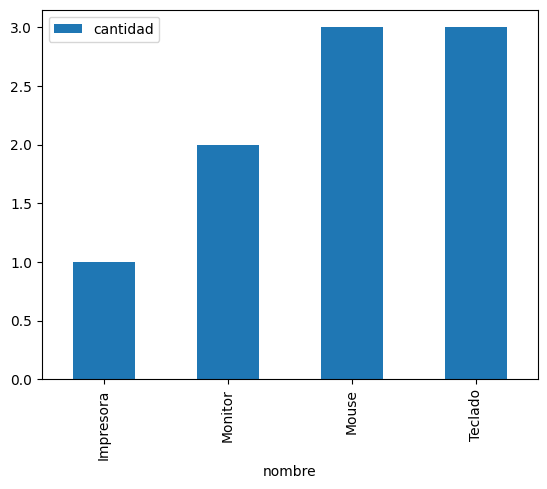

In [26]:
import matplotlib.pyplot as plt
det_ped.groupby('nombre').agg('sum').plot(kind='bar',y='cantidad')
plt.show()